<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*Este cuaderno contiene un extracto del [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) de Jake VanderPlas; el contenido está disponible [en GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*El texto se publica bajo la [licencia CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), y el código bajo la [licencia MIT](https://opensource.org/licenses/MIT). Si encuentras útil este contenido, por favor considera apoyar el trabajo [comprando el libro](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [En profundidad: Árboles de Decisión y Bosques Aleatorios](05.08-Random-Forests.ipynb) | [Contenido](Index.ipynb) | [En profundidad: Aprendizaje de Variedades](05.10-Manifold-Learning.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"></a>


#  En profundidad: Análisis de Componentes Principales (PCA)

Hasta ahora, hemos estado viendo en profundidad estimadores de aprendizaje supervisado: aquellos estimadores que predicen etiquetas basadas en datos de entrenamiento etiquetados.
Aquí comenzamos a ver varios estimadores no supervisados, que pueden resaltar aspectos interesantes de los datos sin referencia a etiquetas conocidas.

En esta sección, exploramos quizás uno de los algoritmos no supervisados más ampliamente usados, el análisis de componentes principales (PCA).
PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta de visualización, para filtrado de ruido, para extracción y creación de características, y mucho más.
Después de una breve discusión conceptual del algoritmo PCA, veremos un par de ejemplos de estas aplicaciones.

Comenzamos con las importaciones estándar:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducción al Análisis de Componentes Principales

El análisis de componentes principales es un método rápido y flexible no supervisado para la reducción de dimensionalidad en datos, que vimos brevemente en [Introducción a Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb).
Su comportamiento es más fácil de visualizar observando un conjunto de datos bidimensional.
Considera los siguientes 200 puntos:

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A simple vista, está claro que existe una relación casi lineal entre las variables x e y.
Esto recuerda a los datos de regresión lineal que exploramos en [En profundidad: Regresión Lineal](05.06-Linear-Regression.ipynb), pero el contexto aquí es ligeramente diferente: en lugar de intentar *predecir* los valores de y a partir de los valores de x, el problema de aprendizaje no supervisado intenta aprender sobre la *relación* entre los valores de x e y.

En el análisis de componentes principales, esta relación se cuantifica encontrando una lista de los *ejes principales* en los datos, y usando esos ejes para describir el conjunto de datos.
Usando el estimador ``PCA`` de Scikit-Learn, podemos calcular esto así:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


El ajuste aprende algunas cantidades de los datos, principalmente los "componentes" y la "varianza explicada":

In [4]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para ver qué significan estos números, vamos a visualizarlos como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector, y la "varianza explicada" para definir la longitud al cuadrado del vector:

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# graficar datos
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los *ejes principales* de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos—más precisamente, es una medida de la varianza de los datos cuando se proyectan sobre ese eje.
La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

Si graficamos estos componentes principales junto a los datos originales, vemos los gráficos mostrados aquí:

![](figures/05.09-PCA-rotation.png)
[fuente de la figura en el Apéndice](06.00-Figure-Code.ipynb#Principal-Components-Rotation)

Esta transformación de los ejes de los datos a los ejes principales es una *transformación afín*, lo que básicamente significa que se compone de una traslación, rotación y escalamiento uniforme.

Aunque este algoritmo para encontrar componentes principales puede parecer solo una curiosidad matemática, resulta tener aplicaciones muy amplias en el mundo del aprendizaje automático y la exploración de datos.

### PCA como reducción de dimensionalidad

Usar PCA para reducción de dimensionalidad implica eliminar uno o más de los componentes principales más pequeños, resultando en una proyección de menor dimensión de los datos que preserva la máxima varianza.

Aquí hay un ejemplo de uso de PCA como transformación de reducción de dimensionalidad:

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("forma original:   ", X.shape)
print("forma transformada:", X_pca.shape)

forma original:    (200, 2)
forma transformada: (200, 1)


Los datos transformados se han reducido a una sola dimensión.
Para entender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y graficarlos junto con los datos originales:

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los puntos claros son los datos originales, mientras que los puntos oscuros son la versión proyectada.
Esto deja claro lo que significa una reducción de dimensionalidad con PCA: la información a lo largo del eje principal menos importante se elimina, dejando solo el/los componente(s) de los datos con mayor varianza.
La fracción de varianza que se elimina (proporcional a la dispersión de los puntos sobre la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es en cierto sentido "suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50%, la relación general entre los puntos de datos se conserva en su mayoría.

### PCA para visualización: Dígitos escritos a mano

La utilidad de la reducción de dimensionalidad puede no ser completamente evidente en solo dos dimensiones, pero se vuelve mucho más clara al observar datos de alta dimensión.
Para ver esto, echemos un vistazo rápido a la aplicación de PCA a los datos de dígitos que vimos en [En profundidad: Árboles de Decisión y Bosques Aleatorios](05.08-Random-Forests.ipynb).

Comenzamos cargando los datos:

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recuerda que los datos consisten en imágenes de 8×8 píxeles, lo que significa que son de 64 dimensiones.
Para obtener una intuición sobre las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos:

In [10]:
pca = PCA(2)  # proyectar de 64 a 2 dimensiones
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Ahora podemos graficar los dos primeros componentes principales de cada punto para aprender sobre los datos:

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar();

C:\Users\uie70742\AppData\Local\Temp\ipykernel_56408\3695166325.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('spectral', 10))


ValueError: 'spectral' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

Recuerda lo que significan estos componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con mayor varianza.
Esencialmente, hemos encontrado el estiramiento y rotación óptimos en el espacio de 64 dimensiones que nos permite ver la disposición de los dígitos en dos dimensiones, y lo hemos hecho de manera no supervisada—es decir, sin referencia a las etiquetas.

### ¿Qué significan los componentes?

Podemos ir un poco más allá aquí, y comenzar a preguntar qué *significan* las dimensiones reducidas.
Este significado puede entenderse en términos de combinaciones de vectores base.
Por ejemplo, cada imagen en el conjunto de entrenamiento se define por una colección de 64 valores de píxeles, que llamaremos el vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Una forma de pensar en esto es en términos de una base de píxeles.
Es decir, para construir la imagen, multiplicamos cada elemento del vector por el píxel que describe, y luego sumamos los resultados para construir la imagen:

$$
{\rm imagen}(x) = x_1 \cdot{\rm (píxel~1)} + x_2 \cdot{\rm (píxel~2)} + x_3 \cdot{\rm (píxel~3)} \cdots x_{64} \cdot{\rm (píxel~64)}
$$

Una forma en que podríamos imaginar reducir la dimensión de estos datos es eliminando todos menos unos pocos de estos vectores base.
Por ejemplo, si usamos solo los primeros ocho píxeles, obtenemos una proyección de los datos de ocho dimensiones, pero no es muy representativa de toda la imagen: ¡hemos descartado casi el 90% de los píxeles!

![](figures/05.09-digits-pixel-components.png)
[fuente de la figura en el Apéndice](06.00-Figure-Code.ipynb#Digits-Pixel-Components)

La fila superior de paneles muestra los píxeles individuales, y la fila inferior muestra la contribución acumulada de estos píxeles a la construcción de la imagen.
Usando solo ocho de los componentes base de píxeles, solo podemos construir una pequeña parte de la imagen de 64 píxeles.
Si continuáramos esta secuencia y usáramos los 64 píxeles, recuperaríamos la imagen original.

Pero la representación por píxeles no es la única elección de base. También podemos usar otras funciones base, que contienen alguna contribución predefinida de cada píxel, y escribir algo como

$$
imagen(x) = {\rm media} + x_1 \cdot{\rm (base~1)} + x_2 \cdot{\rm (base~2)} + x_3 \cdot{\rm (base~3)} \cdots
$$

PCA puede considerarse como un proceso de elegir funciones base óptimas, de modo que sumar solo las primeras de ellas sea suficiente para reconstruir adecuadamente la mayoría de los elementos en el conjunto de datos.
Los componentes principales, que actúan como la representación de baja dimensión de nuestros datos, son simplemente los coeficientes que multiplican cada uno de los elementos en esta serie.
Esta figura muestra una representación similar de la reconstrucción de este dígito usando la media más las primeras ocho funciones base de PCA:

![](figures/05.09-digits-pca-components.png)
[fuente de la figura en el Apéndice](06.00-Figure-Code.ipynb#Digits-PCA-Components)

A diferencia de la base de píxeles, la base de PCA nos permite recuperar las características más importantes de la imagen de entrada con solo la media más ocho componentes.
La cantidad de cada píxel en cada componente es el análogo de la orientación del vector en nuestro ejemplo bidimensional.
En este sentido, PCA proporciona una representación de baja dimensión de los datos: descubre un conjunto de funciones base que son más eficientes que la base nativa de píxeles de los datos de entrada.

### Elegir el número de componentes

Una parte vital de usar PCA en la práctica es la capacidad de estimar cuántos componentes se necesitan para describir los datos.
Esto puede determinarse observando la *varianza explicada acumulada* como función del número de componentes:

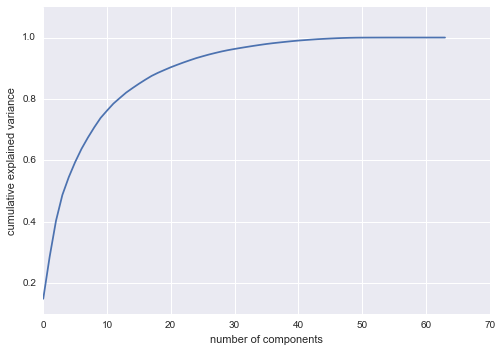

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulada');

Esta curva cuantifica cuánta de la varianza total, de 64 dimensiones, está contenida dentro de los primeros $N$ componentes.
Por ejemplo, vemos que con los dígitos los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que necesitas alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información (según la varianza explicada) y que necesitaríamos alrededor de 20 componentes para retener el 90% de la varianza. Observar este gráfico para un conjunto de datos de alta dimensión puede ayudarte a entender el nivel de redundancia presente en múltiples observaciones.

## PCA como filtrado de ruido

PCA también puede usarse como un enfoque de filtrado para datos ruidosos.
La idea es esta: cualquier componente con varianza mucho mayor que el efecto del ruido debería ser relativamente poco afectado por el ruido.
Así que si reconstruyes los datos usando solo el subconjunto más grande de componentes principales, deberías estar manteniendo preferentemente la señal y eliminando el ruido.

Veamos cómo se ve esto con los datos de dígitos.
Primero graficaremos varios de los datos originales sin ruido:

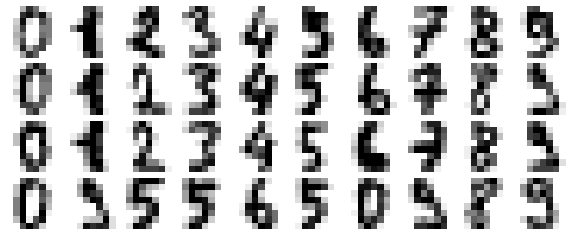

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora agreguemos algo de ruido aleatorio para crear un conjunto de datos ruidoso, y volvamos a graficarlo:

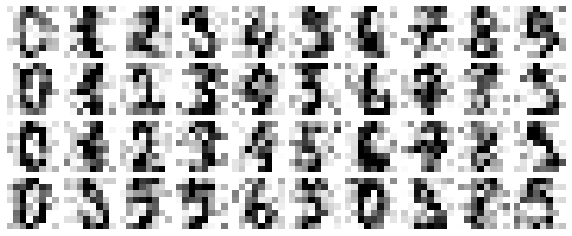

In [14]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Es evidente a simple vista que las imágenes son ruidosas y contienen píxeles espurios.
Entrenemos un PCA en los datos ruidosos, solicitando que la proyección preserve el 50% de la varianza:

In [15]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Aquí, el 50% de la varianza equivale a 12 componentes principales.
Ahora calculamos estos componentes, y luego usamos la inversa de la transformación para reconstruir los dígitos filtrados:

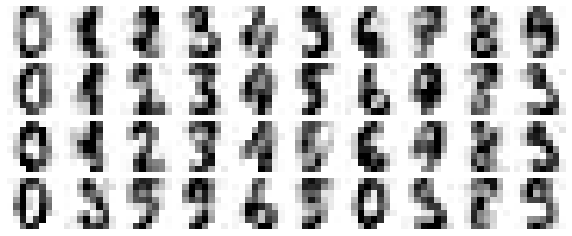

In [16]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de preservar la señal/filtrar el ruido hace que PCA sea una rutina muy útil para la selección de características—por ejemplo, en lugar de entrenar un clasificador en datos de muy alta dimensión, podrías entrenar el clasificador en la representación de menor dimensión, lo que automáticamente servirá para filtrar el ruido aleatorio en las entradas.

## Ejemplo: Eigenfaces

Anteriormente exploramos un ejemplo de uso de una proyección PCA como selector de características para reconocimiento facial con una máquina de soporte vectorial (ver [En profundidad: Máquinas de Soporte Vectorial](05.07-Support-Vector-Machines.ipynb)).
Aquí veremos un poco más de lo que implica eso.
Recuerda que estábamos usando el conjunto de datos Labeled Faces in the Wild disponible a través de Scikit-Learn:

In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Veamos los ejes principales que abarcan este conjunto de datos.
Debido a que este es un conjunto de datos grande, usaremos ``RandomizedPCA``—contiene un método aleatorio para aproximar los primeros $N$ componentes principales mucho más rápido que el estimador estándar ``PCA``, y por lo tanto es muy útil para datos de alta dimensión (aquí, una dimensionalidad de casi 3,000).
Veremos los primeros 150 componentes:

In [18]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

RandomizedPCA(copy=True, iterated_power=3, n_components=150,
       random_state=None, whiten=False)

En este caso, puede ser interesante visualizar las imágenes asociadas con los primeros componentes principales (técnicamente conocidos como "autovectores",
por lo que este tipo de imágenes a menudo se llaman "eigenfaces").
Como puedes ver en esta figura, son tan inquietantes como suenan:

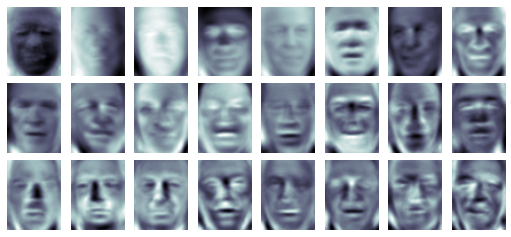

In [19]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Los resultados son muy interesantes y nos dan una idea de cómo varían las imágenes: por ejemplo, los primeros eigenfaces (desde la parte superior izquierda) parecen estar asociados con el ángulo de iluminación en la cara, y los vectores principales posteriores parecen resaltar ciertas características, como ojos, narices y labios.
Veamos la varianza acumulada de estos componentes para ver cuánta información de los datos preserva la proyección:

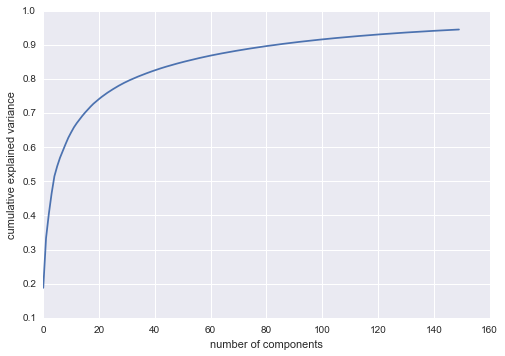

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulada');

Vemos que estos 150 componentes explican poco más del 90% de la varianza.
Eso nos lleva a creer que usando estos 150 componentes, recuperaríamos la mayoría de las características esenciales de los datos.
Para hacerlo más concreto, podemos comparar las imágenes de entrada con las imágenes reconstruidas a partir de estos 150 componentes:

In [ ]:
# Calcular los componentes y las caras proyectadas
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

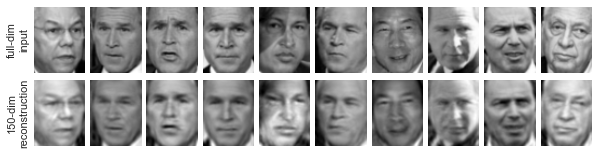

In [ ]:
# Graficar los resultados
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('entrada\ncompleta')
ax[1, 0].set_ylabel('reconstrucción\n150-dim');

La fila superior aquí muestra las imágenes de entrada, mientras que la fila inferior muestra la reconstrucción de las imágenes a partir de solo 150 de las ~3,000 características iniciales.
Esta visualización deja claro por qué la selección de características por PCA utilizada en [En profundidad: Máquinas de Soporte Vectorial](05.07-Support-Vector-Machines.ipynb) fue tan exitosa: aunque reduce la dimensionalidad de los datos en casi un factor de 20, las imágenes proyectadas contienen suficiente información como para que, a simple vista, podamos reconocer a los individuos en la imagen.
Esto significa que nuestro algoritmo de clasificación necesita ser entrenado en datos de 150 dimensiones en lugar de 3,000, lo que dependiendo del algoritmo particular que elijamos, puede llevar a una clasificación mucho más eficiente.

## Resumen del Análisis de Componentes Principales

En esta sección hemos discutido el uso del análisis de componentes principales para reducción de dimensionalidad, para visualización de datos de alta dimensión, para filtrado de ruido y para selección de características dentro de datos de alta dimensión.
Debido a la versatilidad e interpretabilidad de PCA, ha demostrado ser efectivo en una amplia variedad de contextos y disciplinas.
Dado cualquier conjunto de datos de alta dimensión, tiendo a comenzar con PCA para visualizar la relación entre puntos (como hicimos con los dígitos), para entender la varianza principal en los datos (como hicimos con los eigenfaces), y para entender la dimensionalidad intrínseca (graficando la razón de varianza explicada).
Ciertamente, PCA no es útil para todos los conjuntos de datos de alta dimensión, pero ofrece un camino directo y eficiente para obtener información sobre datos de alta dimensión.

La principal debilidad de PCA es que tiende a verse muy afectado por los valores atípicos en los datos.
Por esta razón, se han desarrollado muchas variantes robustas de PCA, muchas de las cuales actúan para descartar iterativamente los puntos de datos que no son bien descritos por los componentes iniciales.
Scikit-Learn contiene un par de variantes interesantes de PCA, incluyendo ``RandomizedPCA`` y ``SparsePCA``, ambas también en el submódulo ``sklearn.decomposition``.
``RandomizedPCA``, que vimos antes, utiliza un método no determinista para aproximar rápidamente los primeros componentes principales en datos de muy alta dimensión, mientras que ``SparsePCA`` introduce un término de regularización (ver [En profundidad: Regresión Lineal](05.06-Linear-Regression.ipynb)) que sirve para imponer esparsidad en los componentes.

En las siguientes secciones, veremos otros métodos de aprendizaje no supervisado que se basan en algunas de las ideas de PCA.

<!--NAVIGATION-->
< [En profundidad: Árboles de Decisión y Bosques Aleatorios](05.08-Random-Forests.ipynb) | [Contenido](Index.ipynb) | [En profundidad: Aprendizaje de Variedades](05.10-Manifold-Learning.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"></a>
